In [1]:
from src.dataset.tno_dataset_collection import TnoDatasetCollection
from src.dataset.emission_field_transforms import GaussianNoiseTransform
import matplotlib.pyplot as plt
from src.common.gnfr_sector import GnfrSector
from src.plotting.city_emission_field_plot import plot_emission_field

In [4]:
CITY = "Zürich"

In [5]:
dataset_collection = TnoDatasetCollection()

data = dataset_collection.get_case_study_data(CITY, year=2015)
data.disable_temporal_transforms()
data.add_sampling_transform(GaussianNoiseTransform())

[INFO] > Loading TNO data from '/home/mustafe-dobra/repositories/inventory-embeddings/data/TNO-GHGco-1km/TNO_by_city/TNO_GHGco_2015_highres_by_city.csv'
[INFO] > Loading TNO data from '/home/mustafe-dobra/repositories/inventory-embeddings/data/TNO-GHGco-1km/TNO_by_city/TNO_GHGco_2018_highres_by_city.csv'                                                                                                                         
[INFO] > Test Set has 13 unique cites!                                                                                                                                                                                                                                           
	Innsbruck, Reims, Siegen, Gdynia, Großzschocher, Dresden, Szczecin, Magdeburg, Prague, Aachen, Győr, Duisburg, Hamburg
[INFO] > Validation Set has 15 unique cites!
	Linz, Koblenz, Zielona Góra, Angers, Ingolstadt, Erfurt, Bydgoszcz, Kalisz, Nijmegen, Southampton, Wałbrzych, Kassel, Frankfurt am Ma

In [6]:
emission_field = data.get_city_emission_field(0, apply_sampling_transforms=False)
vmax = 1.1 * emission_field.co2_ff_area_sources_field.max()

emission_field_transformed = data.get_city_emission_field(0, apply_sampling_transforms=True)
vmax_transformed = 1.1 * emission_field_transformed.co2_ff_area_sources_field.max()

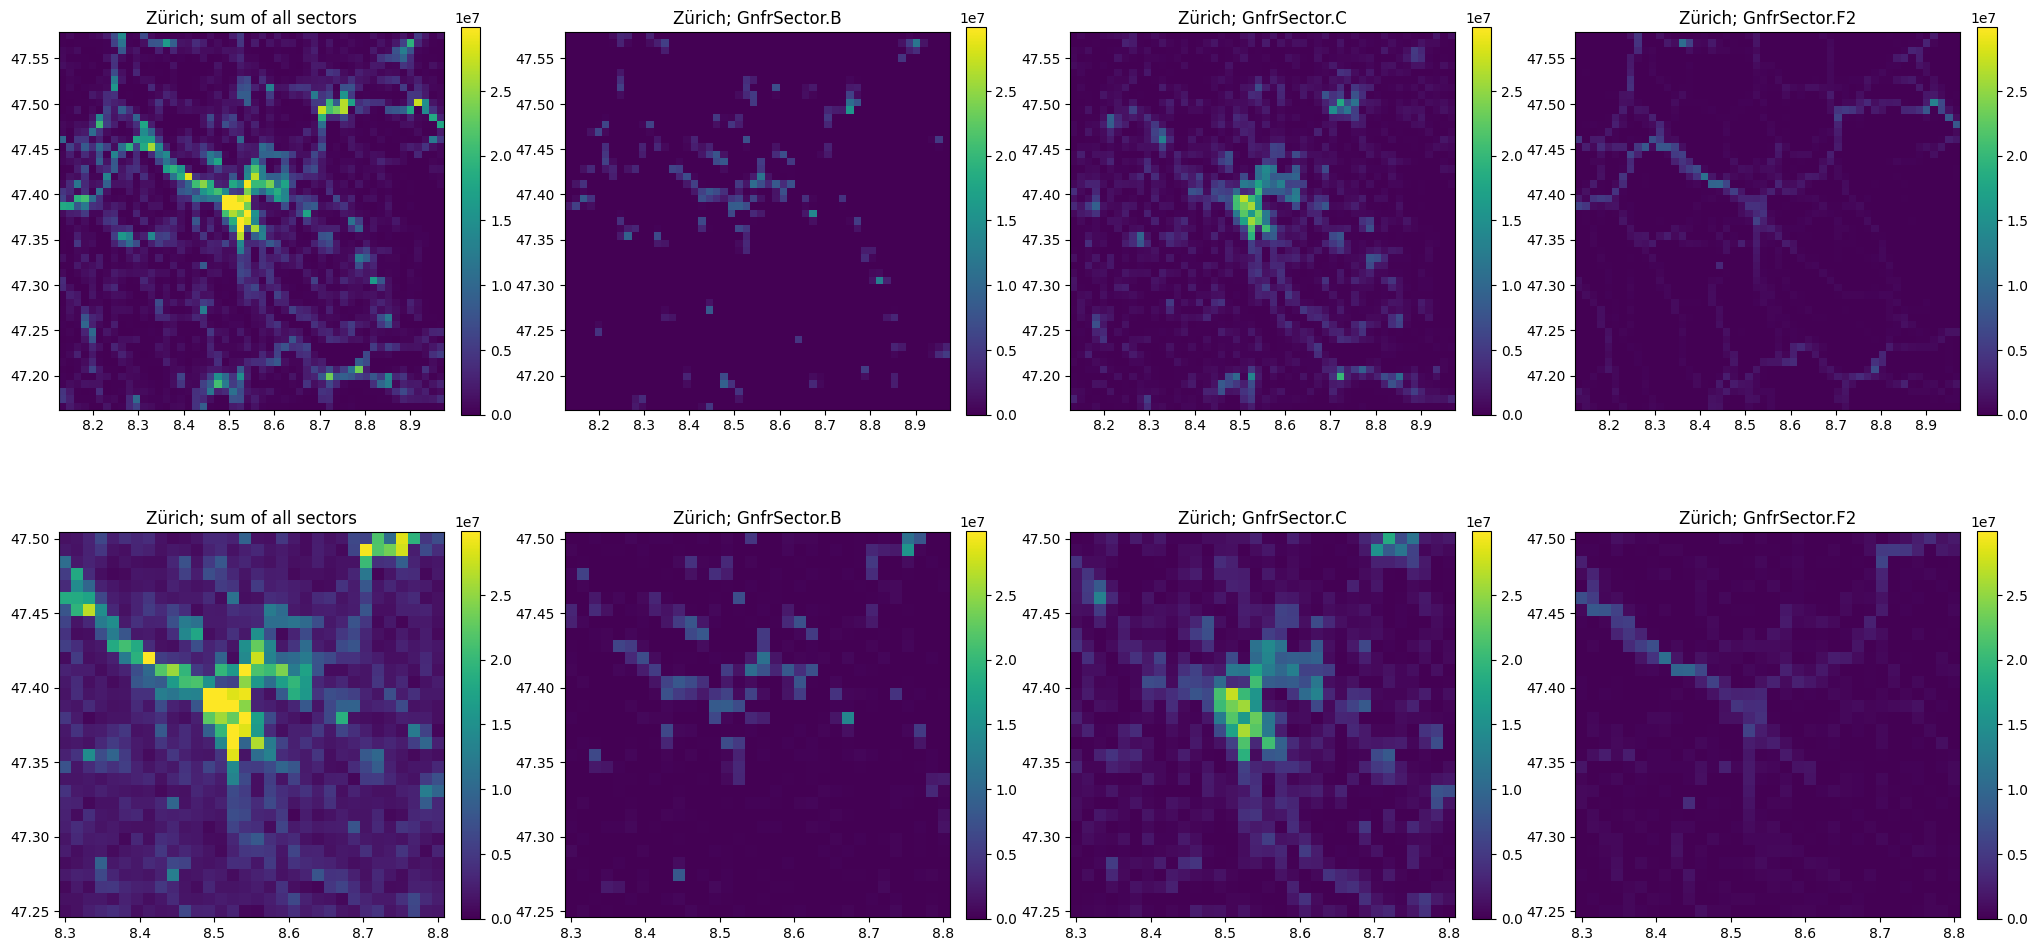

In [7]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(25, 12))

plot_emission_field(emission_field=emission_field, ax=ax1, vmax=vmax)
plot_emission_field(emission_field=emission_field, ax=ax2, sector=GnfrSector.B, vmax=vmax)
plot_emission_field(emission_field=emission_field, ax=ax3, sector=GnfrSector.C, vmax=vmax)
plot_emission_field(emission_field=emission_field, ax=ax4, sector=GnfrSector.F2, vmax=vmax)

plot_emission_field(emission_field=emission_field_transformed, ax=ax5, vmax=vmax)
plot_emission_field(emission_field=emission_field_transformed, ax=ax6, sector=GnfrSector.B, vmax=vmax)
plot_emission_field(emission_field=emission_field_transformed, ax=ax7, sector=GnfrSector.C, vmax=vmax)
plot_emission_field(emission_field=emission_field_transformed, ax=ax8, sector=GnfrSector.F2, vmax=vmax)